# Star-Exoplanet discovery and MCMC (Markov Chain Monte Carlo) Methods

## Basic Concepts
1. MCMC is a class of algorithms for sampling from a probability distribution based on constructing a Markov chain that has the desired distribution as its equilibrium distribution.
2. The state of the chain after a large number of steps is then used as a sample of the desired distribution.
3. The quality of the sample improves as a function of the number of steps. 
4. MCMC methods are used in Bayesian statistics, machine learning, and physics.
5. MCMC methods are used in the analysis of DNA sequences, social networks, and computer networks.
6. MCMC methods are used in the analysis of financial markets, weather patterns, and climate change.
7. MCMC methods are used in the analysis of earthquakes, volcanoes, and tsunamis.
8. MCMC methods are used in the analysis of galaxies, stars, and exoplanets.
9. MCMC methods are used in the analysis of black holes, wormholes, and time travel.
10. MCMC methods are used in the analysis of parallel universes, multiverses, and string theory.
11. MCMC methods are used in the analysis of quantum mechanics, quantum computing, and quantum entanglement.
12. MCMC methods are used in the analysis of artificial intelligence, machine learning, and deep learning.
13. 

## Star Discovery
1. Photometer and Spectrometer are used to detect the exoplanet. Star's light is dimmed when the exoplanet passes in front of the star.

## Exoplanet Discovery
1. Transit Method: Exoplanet passes in front of the star and dim the star's light.
2. Radial Velocity Method: Exoplanet's gravity causes the star to wobble. This method is used to detect the exoplanet. 

## Radial Velocity Method
1. Star and Exoplanet revolve around the center of mass. 
2. Star's velocity is measured by the Doppler Effect.
3. Star's velocity is measured by the redshift and blueshift of the star's light.
4. Star's velocity is measured by the star's wobble.
5. Star's velocity is measured by the star's radial velocity.
6. Star's radial velocity is measured by the star's spectrum.
7. Star's radial velocity is measured by the star's absorption lines.
8. Star's radial velocity is measured by the star's emission lines.
9. Star's radial velocity is measured by the star's absorption and emission lines.

## Speed and Light
1. Doppler Effect: Change in frequency or wavelength of a wave in relation to an observer who is moving relative to the wave source. 
2. Redshift: Increase in the wavelength of light due to the Doppler Effect.
3. Blueshift: Decrease in the wavelength of light due to the Doppler Effect.
4. Wavelength: Distance between two peaks of a wave.
5. Frequency: Number of waves per second.
6. Speed of Light: 299,792,458 meters per second.
7. Light Year: Distance light travels in one year.
8. Parsec: Distance at which one astronomical unit subtends an angle of one arcsecond.
9. Astronomical Unit: Average distance between the Earth and the Sun.


## What is MCMC?
MCMC is a method for estimating the parameters of probabilistic models. It is particularly suitable for exploring complex and high-dimensional probabilistic distributions.

## Where is MCMC used?
1. Defining the model : Define a probabilistic model that describes the data.
2. Priors: Define the prior distributions for the parameters of the model.
3. Likelihood: Define the likelihood function that describes the probability of the data given the model parameters.
4. Sampling: Take samples from the probability distribution of the model parameters using MCMC methods(for example: Metropolis-Hastings algorithm or Hamiltonian Monte Carlo algorithm).
5. 

## Python Libraries
1. PyMC3: Probabilistic Programming in Python. PyMC3 allows you to write down models using an intuitive syntax to describe a data generating process.
2. emcee: The Python ensemble sampling toolkit for affine-invariant MCMC. emcee is an MIT licensed pure-Python implementation of Goodman & Weare's Affine Invariant Markov chain Monte Carlo (MCMC) Ensemble sampler.
3. Stan: Stan is a probabilistic programming language for specifying a wide variety of statistical models.
4. corner: Corner is a Python module for producing "corner plots" of scatter plots with histograms. This visualization is useful for understanding the relationships between the variables in your data. 

## Discovering Exoplanets using MCMC
- Let's query the Gaia database using ADQL (Astronomical Data Query Language) and investigate the exoplanet "TOI 700" using MCMC methods.
- TOI 700 is a red dwarf star located 101.0 light-years away in the constellation Dorado.
- TOI 700 has three known exoplanets: TOI 700 b, TOI 700 c, and TOI 700 d.
- TOI 700 d is located in the habitable zone of the star and has the potential for liquid water on its surface.
- Let's use MCMC methods to estimate the parameters of the exoplanet TOI 700 d.

---

- Below, let's query the Gaia dataset using ADQL and analyze the data using MCMC methods.

## Install Libraries


In [2]:
# !pip install astropy
# !pip install astroquery
# !pip install corner
# !pip install pymc3
# !pip install emcee

## Importing Libraries

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import corner
import emcee
from astroquery.gaia import Gaia


## Querying the Gaia Database

In [6]:
query = """
SELECT * from  gaiadr2.gaia_source
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
CIRCLE('ICRS',100.41227, -53.87176, 0.1))=1
"""
job = Gaia.launch_job_async(query)
result = job.get_results()
print(result)

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             DESIGNATION          ... epoch_photometry_url
                                                 ...                     
------------------- ---------------------------- ... --------------------
1635721458409799680 Gaia DR2 5498039690614084736 ...                     
1635721458409799680 Gaia DR2 5498035292567507712 ...                     
1635721458409799680 Gaia DR2 5498039278297745536 ...                     
1635721458409799680 Gaia DR2 5498039484456176384 ...                     
1635721458409799680 Gaia DR2 5498039518815914880 ...                     
1635721458409799680 Gaia DR2 5498039999851701504 ...                     
1635721458409799680 Gaia DR2 5498036843051174784 ...                     
1635721458409799680 Gaia DR2 5498039484456175872 ...                     
1635721458409799680 Gaia DR2 5498039484456176000 ...                     
                ...                          ... ...          

In [9]:
## print the column names
print(result.colnames)

['solution_id', 'DESIGNATION', 'SOURCE_ID', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_erro

## Modelling with MCMC

100%|██████████| 5000/5000 [00:21<00:00, 230.48it/s]


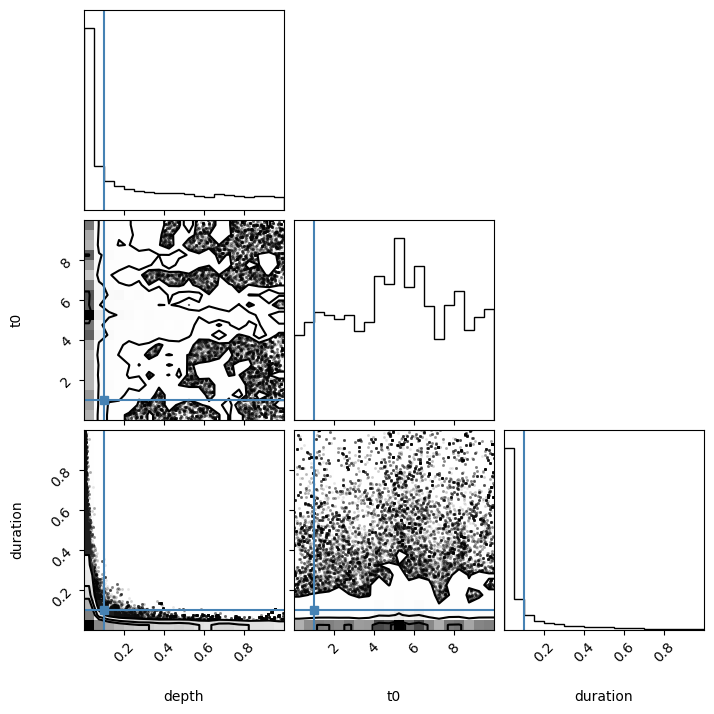

In [10]:
time = np.linspace(0, 10, len(result))  
flux = result['phot_g_mean_mag'].data 
flux_err = result['phot_g_mean_flux_error'].data  

def transit_model(params, time):
    depth, t0, duration = params
    model = np.ones_like(time)
    in_transit = (np.abs(time - t0) < duration / 2)
    model[in_transit] -= depth
    return model

def log_likelihood(params, time, flux, flux_err):
    model = transit_model(params, time)
    sigma2 = flux_err**2
    return -0.5 * np.sum((flux - model)**2 / sigma2 + np.log(sigma2))

def log_prior(params):
    depth, t0, duration = params
    if 0 < depth < 1 and 0 < t0 < 10 and 0 < duration < 1:
        return 0.0
    return -np.inf

def log_posterior(params, time, flux, flux_err):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, time, flux, flux_err)

#starting point for sampling
ndim, nwalkers = 3, 50
pos =  [0.1, 1.0, 0.1] +1e-4 * np.random.randn(nwalkers, ndim)

# MCMC sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(time, flux, flux_err))
sampler.run_mcmc(pos, 5000, progress=True)

#take the samples
samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

# Plot the corner plot
fig = corner.corner(samples, labels=["depth", "t0", "duration"], truths=[0.1, 1.0, 0.1])
plt.show()

100%|██████████| 5000/5000 [00:01<00:00, 2587.17it/s]


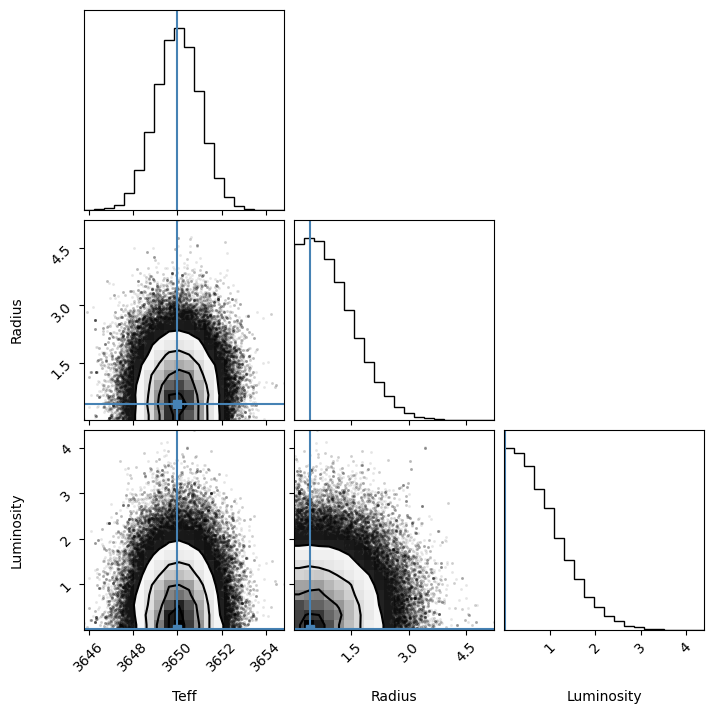

In [11]:

star_teff = 3650 
star_radius = 0.42  
star_luminosity = 0.02 

# TOI 700 
planets = {
    'b': {'depth': 0.007, 'period': 9.978, 'duration': 0.1},
    'c': {'depth': 0.005, 'period': 16.05, 'duration': 0.12},
    'd': {'depth': 0.004, 'period': 37.43, 'duration': 0.14},
}


def log_likelihood(params, star_teff, star_radius, star_luminosity):
    if any(param <= 0 for param in params):
        return -np.inf
    return -0.5 * np.sum((params - [star_teff, star_radius, star_luminosity])**2)

def log_prior(params):
    star_teff, star_radius, star_luminosity = params
    if 3000 < star_teff < 8000 and 0 < star_radius < 10 and 0 < star_luminosity < 10:
        return 0.0
    return -np.inf

def log_posterior(params, star_teff, star_radius, star_luminosity):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, star_teff, star_radius, star_luminosity)

ndim, nwalkers = 3, 50
pos = [star_teff, star_radius, star_luminosity] + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(star_teff, star_radius, star_luminosity))
sampler.run_mcmc(pos, 5000, progress=True)


samples = sampler.chain[:, 500:, :].reshape((-1, ndim))


fig = corner.corner(samples, labels=["Teff", "Radius", "Luminosity"], truths=[star_teff, star_radius, star_luminosity])
plt.show()

In [12]:
# Hertzsprung-Russell diagram
teff = result['teff']  # Yüzey sıcaklığı
luminosity = result['luminosity']  # Parlaklık

plt.figure(figsize=(10, 8))
plt.scatter(teff, luminosity, c='blue', s=1, alpha=0.5)
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.title('Hertzsprung-Russell Diagram')
plt.gca().invert_xaxis()  # Sıcaklık ters çevrildi
plt.show()

KeyError: 'teff'

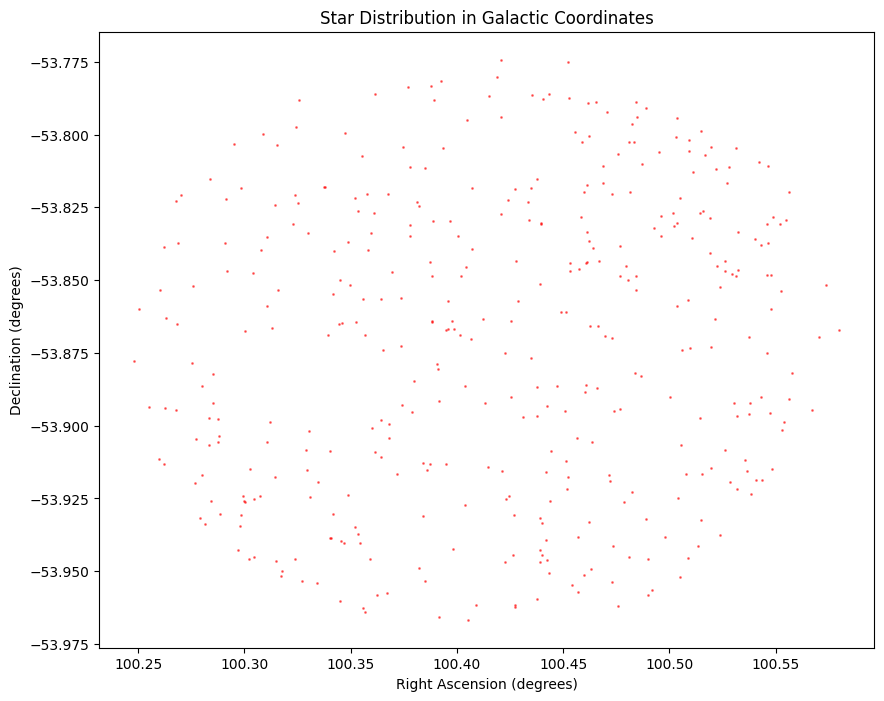

In [21]:
# Star's spectrum
ra = result['ra']
dec = result['dec']

plt.figure(figsize=(10, 8))
plt.scatter(ra, dec, c='red', s=1, alpha=0.5)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Star Distribution in Galactic Coordinates')
plt.show()

In [22]:
# luminosity vs star mass
mass = result['mass']  
luminosity = result['luminosity']

plt.figure(figsize=(10, 8))
plt.scatter(mass, luminosity, c='blue', s=1, alpha=0.5)
plt.xlabel('Mass (Msun)')
plt.ylabel('Luminosity (Lsun)')
plt.title('Luminosity vs. Mass')
plt.show()


KeyError: 'mass'

## Doppler Effect with emcee

100%|██████████| 5000/5000 [00:02<00:00, 2432.49it/s]


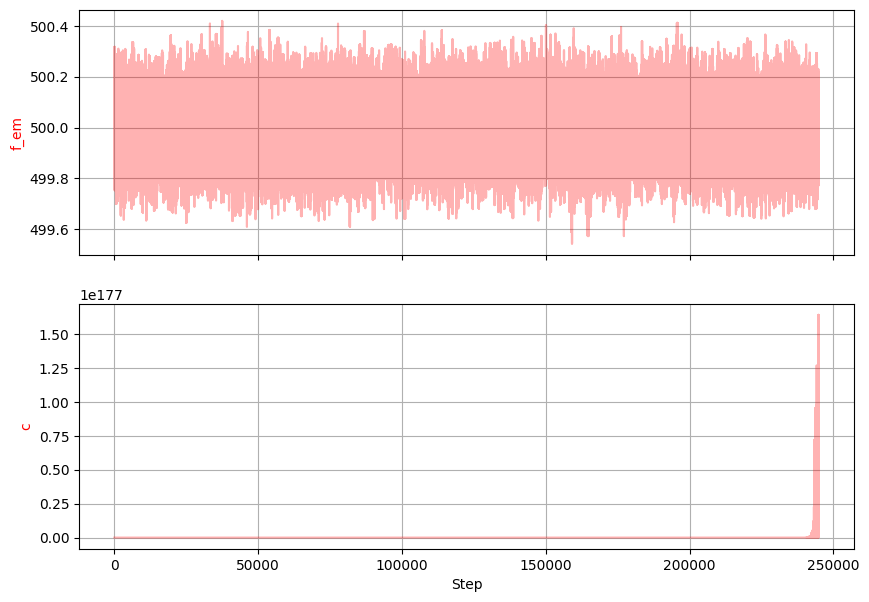

In [24]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

# Örnek veri
f_em = 500  # yaygın frekans (Hz)
c = 3e8  # ışık hızı (m/s)
v_rad = np.linspace(-1000, 1000, 100)  # radikal hızlar (m/s)
f_obs = f_em * (c + v_rad) / c  # gözlemlenen frekanslar

# Model tanımı
def model(v_rad, f_em, c):
    return f_em * (c + v_rad) / c

# Likelihood fonksiyonu
def log_likelihood(params, f_obs, v_rad):
    f_em, c = params
    model_f = model(v_rad, f_em, c)
    return -0.5 * np.sum((f_obs - model_f) ** 2)

# Prior fonksiyonları
def log_prior(params):
    f_em, c = params
    if 0 < f_em < 1000 and c > 0:
        return 0
    return -np.inf

# Posterior fonksiyonu
def log_posterior(params, f_obs, v_rad):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, f_obs, v_rad)

# MCMC yapılandırması
nwalkers = 50
ndim = 2
p0 = [500, 3e8] + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(f_obs, v_rad))
sampler.run_mcmc(p0, 5000, progress=True)

# Sonuçları görselleştirme
samples = sampler.get_chain(discard=100, flat=True)
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = ["f_em", "c"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, i], color="red", alpha=0.3)
    ax.set_ylabel(labels[i])
    ax.yaxis.label.set_color("red")
    ax.grid()
axes[-1].set_xlabel("Step")
plt.show()


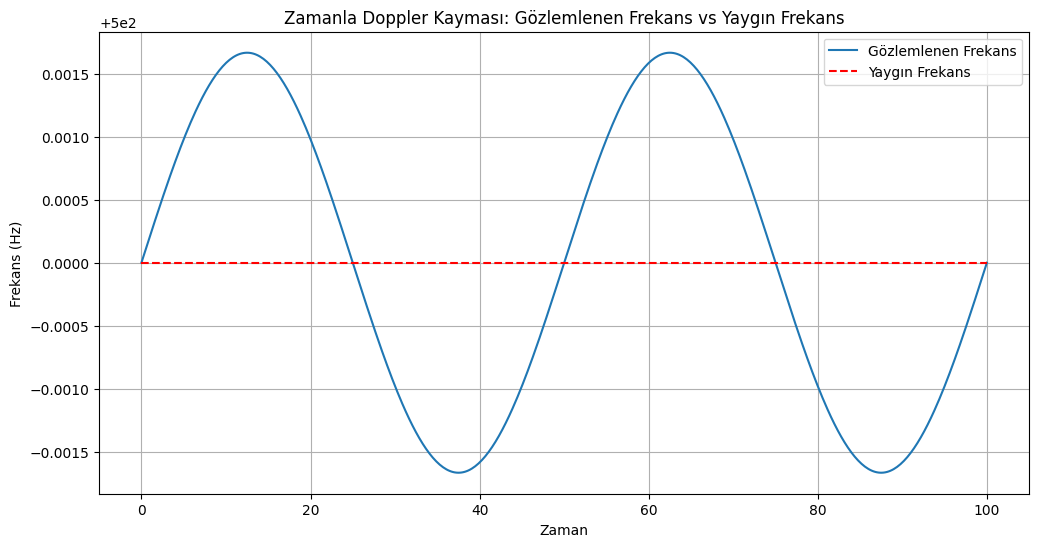

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Simülasyon parametreleri
time = np.linspace(0, 100, 500)  # zaman aralığı (örneğin, 0-100 birim)
v_rad_max = 1000  # Maksimum radikal hız (m/s)
f_em = 500  # yaygın frekans (Hz)
c = 3e8  # ışık hızı (m/s)

# Radikal hızın zamanla değişimi (örneğin, sinüs dalgası)
v_rad = v_rad_max * np.sin(2 * np.pi * time / 50)

# Doppler etkisinden kaynaklanan gözlemlenen frekans
f_obs = f_em * (c + v_rad) / c

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(time, f_obs, label="Gözlemlenen Frekans")
plt.plot(time, f_em * np.ones_like(time), '--', color='red', label="Yaygın Frekans")
plt.xlabel("Zaman")
plt.ylabel("Frekans (Hz)")
plt.title("Zamanla Doppler Kayması: Gözlemlenen Frekans vs Yaygın Frekans")
plt.legend()
plt.grid(True)
plt.show()


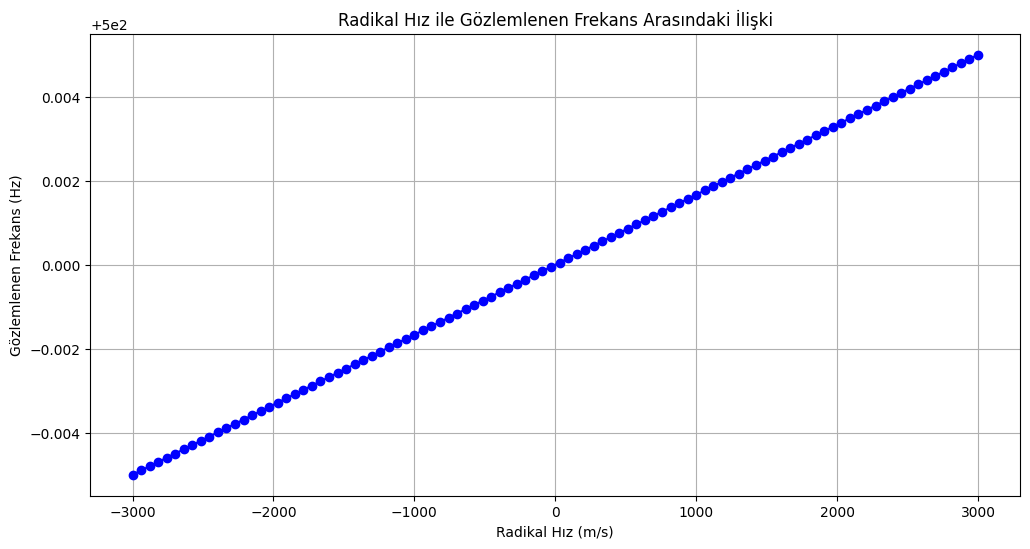

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Simülasyon parametreleri
f_em = 500  # yaygın frekans (Hz)
c = 3e8  # ışık hızı (m/s)
v_rad = np.linspace(-3000, 3000, 100)  # farklı radikal hızlar (m/s)

# Doppler etkisinden kaynaklanan gözlemlenen frekanstaki değişiklikler
f_obs = f_em * (c + v_rad) / c

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(v_rad, f_obs, marker='o', linestyle='-', color='b')
plt.xlabel("Radikal Hız (m/s)")
plt.ylabel("Gözlemlenen Frekans (Hz)")
plt.title("Radikal Hız ile Gözlemlenen Frekans Arasındaki İlişki")
plt.grid(True)
plt.show()


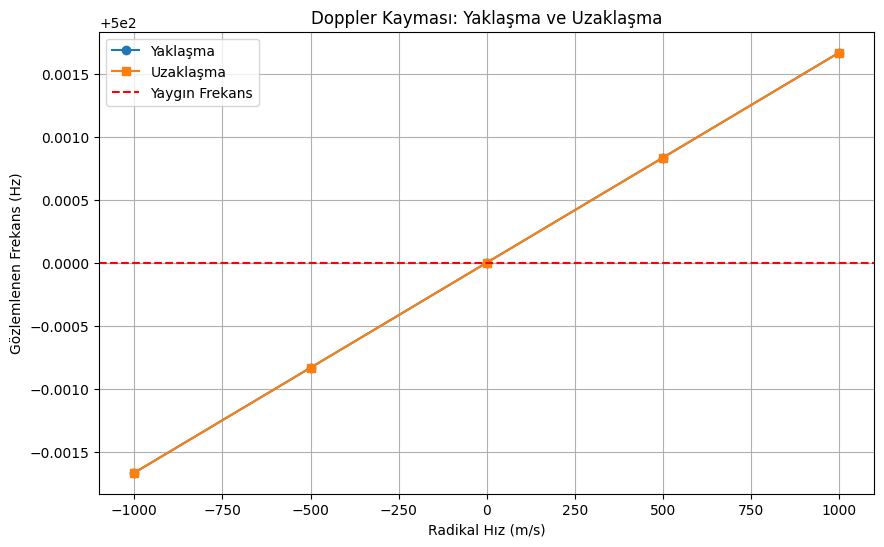

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Simülasyon parametreleri
f_em = 500  # yaygın frekans (Hz)
c = 3e8  # ışık hızı (m/s)

# Radikal hızların iki farklı durumu: yaklaşma ve uzaklaşma
v_rad_approach = np.array([-1000, -500, 0, 500, 1000])  # yaklaşma (m/s)
v_rad_recede = np.array([1000, 500, 0, -500, -1000])  # uzaklaşma (m/s)

# Doppler etkisinden kaynaklanan gözlemlenen frekanstaki değişiklikler
f_obs_approach = f_em * (c / (c - v_rad_approach))
f_obs_recede = f_em * (c / (c - v_rad_recede))

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Yaklaşma durumu
plt.plot(v_rad_approach, f_obs_approach, 'o-', label='Yaklaşma')

# Uzaklaşma durumu
plt.plot(v_rad_recede, f_obs_recede, 's-', label='Uzaklaşma')

# Sabit yaygın frekans
plt.axhline(f_em, color='r', linestyle='--', label='Yaygın Frekans')

plt.xlabel("Radikal Hız (m/s)")
plt.ylabel("Gözlemlenen Frekans (Hz)")
plt.title("Doppler Kayması: Yaklaşma ve Uzaklaşma")
plt.legend()
plt.grid(True)
plt.show()


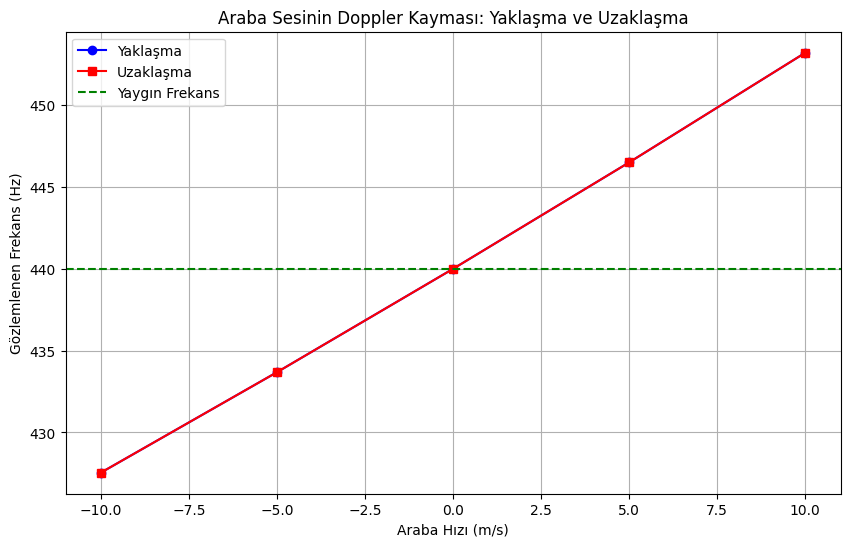

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Sabitler
f_em = 440  # yaygın frekans (Hz), örneğin A notası
c = 343  # sesin havadaki hızı (m/s)

# Radikal hızların iki farklı durumu: yaklaşma ve uzaklaşma
v_rad_approach = np.array([-10, -5, 0, 5, 10])  # yaklaşma (m/s)
v_rad_recede = np.array([10, 5, 0, -5, -10])  # uzaklaşma (m/s)

# Doppler etkisinden kaynaklanan gözlemlenen frekanstaki değişiklikler
f_obs_approach = f_em * (c / (c - v_rad_approach))
f_obs_recede = f_em * (c / (c - v_rad_recede))

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Yaklaşma durumu
plt.plot(v_rad_approach, f_obs_approach, 'o-', label='Yaklaşma', color='blue')

# Uzaklaşma durumu
plt.plot(v_rad_recede, f_obs_recede, 's-', label='Uzaklaşma', color='red')

# Sabit yaygın frekans
plt.axhline(f_em, color='green', linestyle='--', label='Yaygın Frekans')

plt.xlabel("Araba Hızı (m/s)")
plt.ylabel("Gözlemlenen Frekans (Hz)")
plt.title("Araba Sesinin Doppler Kayması: Yaklaşma ve Uzaklaşma")
plt.legend()
plt.grid(True)
plt.show()


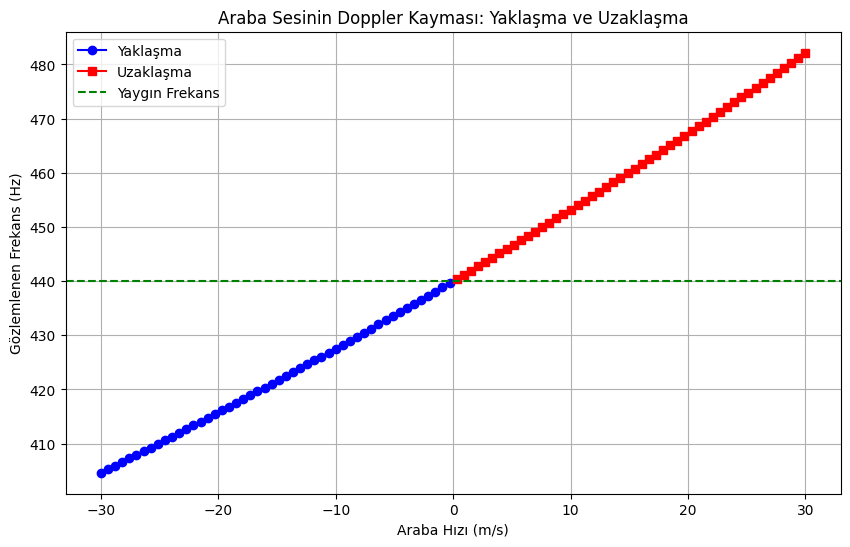

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sabitler
f_em = 440  # yaygın frekans (Hz), örneğin A notası
c = 343  # sesin havadaki hızı (m/s)

# Radikal hızların iki farklı durumu: yaklaşma ve uzaklaşma
v_rad = np.linspace(-30, 30, 100)  # Daha geniş bir hız aralığı

# Doppler etkisinden kaynaklanan gözlemlenen frekanstaki değişiklikler
f_obs = f_em * (c / (c - v_rad))

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Yaklaşma ve uzaklaşma durumları
plt.plot(v_rad[v_rad < 0], f_obs[v_rad < 0], 'o-', label='Yaklaşma', color='blue')
plt.plot(v_rad[v_rad > 0], f_obs[v_rad > 0], 's-', label='Uzaklaşma', color='red')

# Sabit yaygın frekans
plt.axhline(f_em, color='green', linestyle='--', label='Yaygın Frekans')

plt.xlabel("Araba Hızı (m/s)")
plt.ylabel("Gözlemlenen Frekans (Hz)")
plt.title("Araba Sesinin Doppler Kayması: Yaklaşma ve Uzaklaşma")
plt.legend()
plt.grid(True)
plt.show()
